In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import vaex
from vaex.dataframe import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# Importing the dataset

In [2]:
%%time
df = pd.read_csv("AI_Ready_DMSP_Data.csv")

CPU times: total: 4.02 s
Wall time: 4.84 s


In [3]:
df.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


In [4]:
df.shape

(77367, 154)

# Data Understanding and pre-processing

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SC_AACGM_LAT,77367.0,6.538726e+01,1.103312e+01,4.500086e+01,5.621970e+01,6.637761e+01,7.409415e+01,8.989928e+01
SC_AACGM_LTIME,77367.0,1.208718e+01,6.218445e+00,1.521345e-03,6.802558e+00,1.063679e+01,1.789492e+01,2.399896e+01
ELE_TOTAL_ENERGY_FLUX,77367.0,9.147174e+11,1.083691e+14,6.229923e+06,3.561043e+08,7.891162e+08,1.458833e+10,2.681348e+16
ELE_TOTAL_ENERGY_FLUX_STD,77367.0,3.429840e-01,3.387346e-01,6.140601e-02,1.533352e-01,2.393810e-01,3.943255e-01,6.791971e+00
ELE_AVG_ENERGY,77367.0,5.847641e+02,1.580347e+03,3.000000e+01,4.687497e+01,8.515129e+01,3.471758e+02,3.000000e+04
...,...,...,...,...,...,...,...,...
vsw_5min,77366.0,4.055662e+02,7.218167e+01,2.646000e+02,3.575000e+02,3.950000e+02,4.363000e+02,8.509000e+02
vx_5min,77366.0,-4.042223e+02,7.186296e+01,-8.487000e+02,-4.349000e+02,-3.936000e+02,-3.566000e+02,-2.627000e+02
psw_5min,77366.0,1.938425e+00,1.819393e+00,1.500000e-01,1.000000e+00,1.440000e+00,2.240000e+00,4.576000e+01
borovsky_5min,77366.0,1.615506e+04,1.481219e+04,0.000000e+00,4.943110e+03,1.279319e+04,2.301781e+04,9.939165e+04


In [6]:
df.corr()

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_8724\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,sin_doy,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
SC_AACGM_LAT,1.000000,0.010522,-0.002333,-0.156584,0.105041,-0.170899,-0.050491,-0.153021,-0.040003,0.066366,...,0.003559,-0.006228,-0.001407,0.005245,0.001197,-0.000252,0.000371,0.008447,-0.007587,-0.000645
SC_AACGM_LTIME,0.010522,1.000000,0.005513,0.041206,-0.110069,0.046362,0.011048,-0.112409,0.000684,0.011428,...,0.012596,-0.015911,0.004535,-0.000291,0.011798,-0.009574,0.009744,-0.000749,0.000050,0.006163
ELE_TOTAL_ENERGY_FLUX,-0.002333,0.005513,1.000000,-0.005087,0.015897,-0.005331,-0.004724,-0.000596,-0.006096,0.010003,...,-0.001517,0.001512,-0.001164,0.001734,0.000605,-0.000096,0.000142,-0.000692,0.001332,0.000969
ELE_TOTAL_ENERGY_FLUX_STD,-0.156584,0.041206,-0.005087,1.000000,0.053132,0.992380,-0.154925,0.012717,-0.003344,0.138493,...,-0.004393,0.003554,-0.004823,-0.005065,-0.002946,0.014811,-0.014844,-0.036181,-0.000487,-0.002331
ELE_AVG_ENERGY,0.105041,-0.110069,0.015897,0.053132,1.000000,0.029932,-0.112786,0.047055,0.004385,0.097150,...,0.074440,-0.065573,0.072065,-0.035382,0.061495,0.039608,-0.039808,-0.036264,0.027543,0.052643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vsw_5min,-0.000252,-0.009574,-0.000096,0.014811,0.039608,0.014038,-0.024482,0.045115,-0.018794,0.046594,...,-0.003530,-0.018026,-0.037027,-0.382880,-0.056501,1.000000,-0.999744,0.013080,-0.027737,-0.020854
vx_5min,0.000371,0.009744,0.000142,-0.014844,-0.039808,-0.014009,0.025393,-0.045593,0.018232,-0.046567,...,0.004779,0.016907,0.038211,0.382295,0.057845,-0.999744,1.000000,-0.011599,0.027164,0.022295
psw_5min,0.008447,-0.000749,-0.000692,-0.036181,-0.036264,-0.039005,-0.040348,0.008481,0.011872,-0.019939,...,0.068000,-0.021343,0.127013,0.322405,0.030257,0.013080,-0.011599,1.000000,0.221917,-0.051745
borovsky_5min,-0.007587,0.000050,0.001332,-0.000487,0.027543,-0.005705,-0.042071,-0.005522,0.024599,0.026108,...,0.387123,-0.340757,0.375671,0.060241,0.368024,-0.027737,0.027164,0.221917,1.000000,0.681035


In [7]:
# creating the copy of the dataset
df_cumulative = df.copy()

In [8]:
# changing the date column into datetime format
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)

In [9]:
# list the columns 
df_cumulative.columns.to_list()

['SC_AACGM_LAT',
 'SC_AACGM_LTIME',
 'ELE_TOTAL_ENERGY_FLUX',
 'ELE_TOTAL_ENERGY_FLUX_STD',
 'ELE_AVG_ENERGY',
 'ELE_AVG_ENERGY_STD',
 'ID_SC',
 'sin_ut',
 'cos_ut',
 'sin_doy',
 'cos_doy',
 'sin_SC_AACGM_LTIME',
 'cos_SC_AACGM_LTIME',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AE',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'vx',
 'psw',
 'borovsky',
 'newell',
 'F107_6hr',
 'Bz_6hr',
 'By_6hr',
 'Bx_6hr',
 'AE_6hr',
 'AL_6hr',
 'AU_6hr',
 'SymH_6hr',
 'PC_6hr',
 'vsw_6hr',
 'vx_6hr',
 'psw_6hr',
 'borovsky_6hr',
 'newell_6hr',
 'F107_5hr',
 'Bz_5hr',
 'By_5hr',
 'Bx_5hr',
 'AE_5hr',
 'AL_5hr',
 'AU_5hr',
 'SymH_5hr',
 'PC_5hr',
 'vsw_5hr',
 'vx_5hr',
 'psw_5hr',
 'borovsky_5hr',
 'newell_5hr',
 'F107_3hr',
 'Bz_3hr',
 'By_3hr',
 'Bx_3hr',
 'AE_3hr',
 'AL_3hr',
 'AU_3hr',
 'SymH_3hr',
 'PC_3hr',
 'vsw_3hr',
 'vx_3hr',
 'psw_3hr',
 'borovsky_3hr',
 'newell_3hr',
 'F107_1hr',
 'Bz_1hr',
 'By_1hr',
 'Bx_1hr',
 'AE_1hr',
 'AL_1hr',
 'AU_1hr',
 'SymH_1hr',
 'PC_1hr',
 'vsw_1hr',
 'vx_1hr',
 'psw_1hr',
 '

In [10]:
# Choose columns to drop
cols_to_drop = [c for c in df_cumulative.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('_5min'in c) | ('15min' in c)| ('5hr' in c) | ('F107_' in c) | ('vx' in c) | ('AE' in c) | ('newell' in c) | ('borovsky' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
df_cumulative = df_cumulative.drop(columns=cols_to_drop)

In [11]:
# List the new set of columns
df_cumulative.columns.to_list()

['SC_AACGM_LAT',
 'ELE_TOTAL_ENERGY_FLUX',
 'ID_SC',
 'sin_ut',
 'cos_ut',
 'sin_doy',
 'cos_doy',
 'sin_SC_AACGM_LTIME',
 'cos_SC_AACGM_LTIME',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'psw',
 'Bz_6hr',
 'By_6hr',
 'Bx_6hr',
 'AL_6hr',
 'AU_6hr',
 'SymH_6hr',
 'PC_6hr',
 'vsw_6hr',
 'psw_6hr',
 'Bz_3hr',
 'By_3hr',
 'Bx_3hr',
 'AL_3hr',
 'AU_3hr',
 'SymH_3hr',
 'PC_3hr',
 'vsw_3hr',
 'psw_3hr',
 'Bz_1hr',
 'By_1hr',
 'Bx_1hr',
 'AL_1hr',
 'AU_1hr',
 'SymH_1hr',
 'PC_1hr',
 'vsw_1hr',
 'psw_1hr',
 'Bz_45min',
 'By_45min',
 'Bx_45min',
 'AL_45min',
 'AU_45min',
 'SymH_45min',
 'PC_45min',
 'vsw_45min',
 'psw_45min',
 'Bz_30min',
 'By_30min',
 'Bx_30min',
 'AL_30min',
 'AU_30min',
 'SymH_30min',
 'PC_30min',
 'vsw_30min',
 'psw_30min',
 'Bz_10min',
 'By_10min',
 'Bx_10min',
 'AL_10min',
 'AU_10min',
 'SymH_10min',
 'PC_10min',
 'vsw_10min',
 'psw_10min']

In [12]:
print('number of input features total = {}'.format(df_cumulative.shape[1]))

number of input features total = 73


In [13]:
# Define the threshold above which to remove energy flux values
eflux_threshold_quantile = 99.995
eflux_threshold = .99995

# Define the conversion factor from eV to erg
erg_eV_factor = (1.60218e-12)

In [14]:
# Remove outliers

print(df_cumulative.shape)
threshold_drop_val = np.percentile(df_cumulative['ELE_TOTAL_ENERGY_FLUX'],eflux_threshold_quantile)
print('... dropping rows where total electron energy flux is greater than {:.4E} [eV/cm2/s/ster]'.format(threshold_drop_val))
print('--------> number dropped = {}'.format(len( np.argwhere(df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values > threshold_drop_val) )))
#df_cumulative_LTIMEs = df_cumulative.LTIMEs[ (df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
#df_cumulative_STDs = df_cumulative.STDs[ (df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
df_cumulative = df_cumulative[ (df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
print(df_cumulative.shape)

(77367, 73)
... dropping rows where total electron energy flux is greater than 3.9368E+15 [eV/cm2/s/ster]
--------> number dropped = 4
(77363, 73)


In [15]:
df_cumulative.describe()

,SC_AACGM_LAT,ELE_TOTAL_ENERGY_FLUX,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,...,psw_30min,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min
count,77363.000000,7.736300e+04,77363.000000,77363.000000,77363.000000,77363.000000,77363.000000,77363.000000,77363.000000,77363.000000,...,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000
mean,65.387655,2.942586e+11,12.737420,-0.010660,0.005544,-0.439728,-0.180498,0.032396,-0.078615,182.061155,...,1.921658,0.999876,0.039588,-0.302500,-79.667705,62.627853,-8.822523,0.588782,405.541934,1.934449
std,11.033138,2.247742e+13,1.094167,0.698633,0.715388,0.520797,0.709112,0.833193,0.546418,42.266323,...,1.774154,3.436340,4.252604,3.661881,85.741187,53.712068,16.925225,1.098843,72.189518,1.797954
min,45.000858,6.229923e+06,6.000000,-1.000000,-1.000000,-0.999917,-0.999963,-1.000000,-1.000000,68.900000,...,0.180000,-8.420000,-23.990000,-15.500000,-688.000000,-29.000000,-135.000000,-8.030000,264.600000,0.150000
25%,56.220178,3.561043e+08,12.000000,-0.704015,-0.722364,-0.849817,-0.838280,-0.915647,-0.492601,146.900000,...,1.000000,-1.250000,-3.040000,-3.120000,-104.000000,24.000000,-16.000000,-0.080000,357.400000,1.000000
50%,66.377877,7.890107e+08,13.000000,-0.008727,0.017452,-0.552435,-0.381689,0.212129,-0.115528,178.100000,...,1.440000,0.870000,0.100000,-0.470000,-46.000000,46.000000,-7.000000,0.410000,394.900000,1.440000
75%,74.094442,1.457374e+10,13.000000,0.672367,0.728371,-0.196673,0.527078,0.900469,0.322449,215.100000,...,2.220000,2.850000,3.150000,2.600000,-24.000000,84.000000,1.000000,1.180000,436.300000,2.240000
max,89.899278,3.542682e+15,15.000000,1.000000,1.000000,0.999991,1.000000,1.000000,1.000000,284.000000,...,47.000000,55.470000,23.460000,36.270000,25.000000,379.000000,69.000000,9.990000,832.300000,45.760000


In [16]:
# # Separate training and testing data(
# mask_val = [(df_cumulative.index.year == 2010) & df_cumulative['ID_SC'].values==16)]
# df_val = df_cumulative[mask_val[0]].copy(deep=True)
# df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])
# print('validation data shape = {}'.format(df_val.shape))
# print('train data shape = {}'.format(df_train.shape))
# print('NOTE: we have called the withheld data *validation* data here')

In [17]:
# separate training data and validation data
mask_val = [(df_cumulative.index.year == 2001) & (df_cumulative['ID_SC'].values>6)]

In [18]:
# storing the data of the year 2002 as a validation set
df_val = df_cumulative[mask_val[0]].copy(deep=True)
df_val.head()

,SC_AACGM_LAT,ELE_TOTAL_ENERGY_FLUX,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,...,psw_30min,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min
Datetimes,,,,,,,,,,,,,,,,,,,,,
2001-01-01 06:51:00,73.922498,3.107251e+08,12.0,0.975342,-0.220697,0.017213,0.999852,-0.060503,-0.998168,165.3,...,2.29,-2.41,-0.34,-3.17,-156.0,40.0,-9.0,0.88,290.8,2.70
2001-01-01 06:54:00,67.226807,5.408906e+08,12.0,0.972370,-0.233445,0.017213,0.999852,0.372107,-0.928190,165.3,...,2.29,-2.41,-0.34,-3.17,-156.0,40.0,-9.0,0.88,290.8,2.70
2001-01-01 06:58:00,55.034913,3.561043e+08,12.0,0.968148,-0.250380,0.017213,0.999852,0.608040,-0.793907,165.3,...,1.90,-2.57,-0.34,-3.47,-178.0,45.0,-8.0,0.93,288.5,2.34
2001-01-01 07:00:00,48.654315,3.196454e+08,12.0,0.965926,-0.258819,0.017213,0.999852,0.665768,-0.746159,165.3,...,2.27,-2.29,0.04,-3.54,-176.0,47.0,-8.0,0.80,288.6,2.34
2001-01-01 07:28:00,49.964592,7.835596e+09,12.0,0.927184,-0.374607,0.017213,0.999852,0.979876,-0.199608,165.3,...,2.39,-2.30,0.75,-3.76,-26.0,34.0,-10.0,0.43,286.6,1.84


In [19]:
# storing rest of the data as training data
df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])
df_train.head()

,SC_AACGM_LAT,ELE_TOTAL_ENERGY_FLUX,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,...,psw_30min,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min
Datetimes,,,,,,,,,,,,,,,,,,,,,
1987-01-12 12:57:00,51.143220,2.057827e+08,6.0,-0.246153,-0.969231,0.205104,0.97874,0.996134,0.087845,68.9,...,3.61,1.25,6.52,-3.03,-36.0,19.0,4.0,0.71,364.4,3.09
1987-01-12 12:58:00,54.137207,2.509837e+08,6.0,-0.250380,-0.968148,0.205104,0.97874,0.992626,0.121216,68.9,...,3.61,1.25,6.52,-3.03,-36.0,19.0,4.0,0.71,364.4,3.09
1987-01-12 13:01:00,62.928176,4.469146e+08,6.0,-0.263031,-0.964787,0.205104,0.97874,0.968006,0.250928,68.9,...,3.66,1.51,6.42,-2.72,-61.0,25.0,3.0,0.77,356.0,2.96
1987-01-12 13:02:00,65.719631,1.934849e+10,6.0,-0.267238,-0.963630,0.205104,0.97874,0.950633,0.310316,68.9,...,3.66,1.51,6.42,-2.72,-61.0,25.0,3.0,0.77,356.0,2.96
1987-01-12 13:03:00,68.392364,3.913337e+11,6.0,-0.271440,-0.962455,0.205104,0.97874,0.924624,0.380881,68.9,...,3.66,1.51,6.42,-2.72,-61.0,25.0,3.0,0.77,356.0,2.96


In [20]:
# dropping one null row in validation set
df_val.dropna(inplace=True)

In [21]:
print('validation data shape = {}'.format(df_val.shape))
print('train data shape = {}'.format(df_train.shape))
print('NOTE: we have called the withheld data *validation* data here')

validation data shape = (72711, 73)
train data shape = (4651, 73)
NOTE: we have called the withheld data *validation* data here


In [22]:
# Construct X and y
from sklearn.preprocessing import StandardScaler
feature_cols = [c for c in df_cumulative.columns if not 'ELE' in c]

X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = StandardScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

In [23]:
X_train_scaled

array([[-1.30257863, -1.44256422, -0.01681795, ...,  0.19012527,
        -0.47749414,  0.49201846],
       [-1.02490731, -1.44256422, -0.02344413, ...,  0.19012527,
        -0.47749414,  0.49201846],
       [-0.2096066 , -1.44256422, -0.04327734, ...,  0.26407863,
        -0.65848259,  0.39562449],
       ...,
       [-1.06705786,  1.17351305, -1.15843804, ..., -0.54940832,
        -1.01830487, -1.22824303],
       [-1.37707409,  1.17351305, -1.15688476, ..., -0.54940832,
        -1.01830487, -1.22824303],
       [-1.68007419,  1.17351305, -1.15530243, ..., -0.54940832,
        -1.01830487, -1.22824303]])

In [ ]:
a=30
b=35

In [24]:
# The units of the energy flux are eV/cm2/s/ster
#   --> To remove the 'steradian' multiply by PI (see: https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/2016JA023339)
y_train = y_train * np.pi
y_val = y_val * np.pi
print('NOTE: removing the steradian from the DMSP data BEFORE training')

# Create targets in erg/cm2/s units to explore target in different units
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

# Create targets in log10(eV/cm2/s) units to explore target in different units
y_train[y_train == 0] = 0.00001
y_val[y_val == 0] = 0.00001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

NOTE: removing the steradian from the DMSP data BEFORE training


In [25]:
X_train_scaled.shape

(4651, 72)

In [26]:
# creating the function for calculation of R2-score
from keras import backend as K
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# LeakyReLU Model

Model-1

In [28]:
from tensorflow.keras.optimizers import Adam

In [29]:
# LeakyReLU activation function is used instead of ReLU since the input features have negative values as well
import keras
model1 = Sequential()
model1.add(Dense(128, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='uniform', activation = keras.layers.LeakyReLU(alpha=0.01)))

model1.add(Dense(64, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))

model1.add(Dense(32, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))

model1.add(Dense(1, kernel_initializer='uniform',activation='linear'))
# Compile the model
opt = Adam() # specifying the optimizer used for the model
model1.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])


In [30]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               9344      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19713 (77.00 KB)
Trainable params: 19713 (77.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
import datetime
import os

In [35]:
curr_dt_time = datetime.datetime.now()
# spefying the format in which model needs to be saved
model_name = 'DMSP1' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
 # giving the file path       
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'
# Creating the call back for saving only the best models 
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# creating the callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

callbacks_list = [checkpoint, early_stopping]

In [36]:
history = model1.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=50, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/50
70/73 [===========================>..] - ETA: 0s - loss: 63.5624 - root_mean_squared_error: 7.9726 - r2_score: -46.4844 
Epoch 1: val_loss improved from inf to 38.00243, saving model to DMSP1_2023-08-2203_10_45.521658\model-00001-61.42374-7.83733-38.00243-6.16461.h5
73/73 [==============================] - 5s 44ms/step - loss: 61.4237 - root_mean_squared_error: 7.8373 - r2_score: -44.7535 - val_loss: 38.0024 - val_root_mean_squared_error: 6.1646 - val_r2_score: -32.0535
Epoch 2/50
34/73 [============>.................] - ETA: 0s - loss: 13.9517 - root_mean_squared_error: 3.7352 - r2_score: -7.3148

C:\Users\Yogesh\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/73 [========================>.....] - ETA: 0s - loss: 9.3729 - root_mean_squared_error: 3.0615 - r2_score: -5.1601 
Epoch 2: val_loss improved from 38.00243 to 12.19996, saving model to DMSP1_2023-08-2203_10_45.521658\model-00002-8.24658-2.87169-12.19996-3.49284.h5
73/73 [==============================] - 3s 36ms/step - loss: 8.2466 - root_mean_squared_error: 2.8717 - r2_score: -4.4818 - val_loss: 12.2000 - val_root_mean_squared_error: 3.4928 - val_r2_score: -10.1489
Epoch 3/50
55/73 [=====================>........] - ETA: 0s - loss: 3.9263 - root_mean_squared_error: 1.9815 - r2_score: -1.6357
Epoch 3: val_loss improved from 12.19996 to 11.22507, saving model to DMSP1_2023-08-2203_10_45.521658\model-00003-3.29477-1.81515-11.22507-3.35038.h5
73/73 [==============================] - 3s 37ms/step - loss: 3.2948 - root_mean_squared_error: 1.8152 - r2_score: -1.3230 - val_loss: 11.2251 - val_root_mean_squared_error: 3.3504 - val_r2_score: -9.3312
Epoch 4/50
71/73 [=======================

73/73 [==============================] - 2s 34ms/step - loss: 1.4918 - root_mean_squared_error: 1.2214 - r2_score: -0.1174 - val_loss: 8.9449 - val_root_mean_squared_error: 2.9908 - val_r2_score: -7.2359
Epoch 20/50
56/73 [======================>.......] - ETA: 0s - loss: 1.5791 - root_mean_squared_error: 1.2566 - r2_score: -0.1285
Epoch 20: val_loss did not improve from 8.94491
73/73 [==============================] - 2s 32ms/step - loss: 1.4194 - root_mean_squared_error: 1.1914 - r2_score: -0.0727 - val_loss: 9.7066 - val_root_mean_squared_error: 3.1155 - val_r2_score: -7.9083
Epoch 21/50
56/73 [======================>.......] - ETA: 0s - loss: 1.6352 - root_mean_squared_error: 1.2787 - r2_score: -0.1568
Epoch 21: val_loss improved from 8.94491 to 8.57277, saving model to DMSP1_2023-08-2203_10_45.521658\model-00021-1.46864-1.21187-8.57277-2.92793.h5
73/73 [==============================] - 3s 39ms/step - loss: 1.4686 - root_mean_squared_error: 1.2119 - r2_score: -0.1015 - val_loss: 8

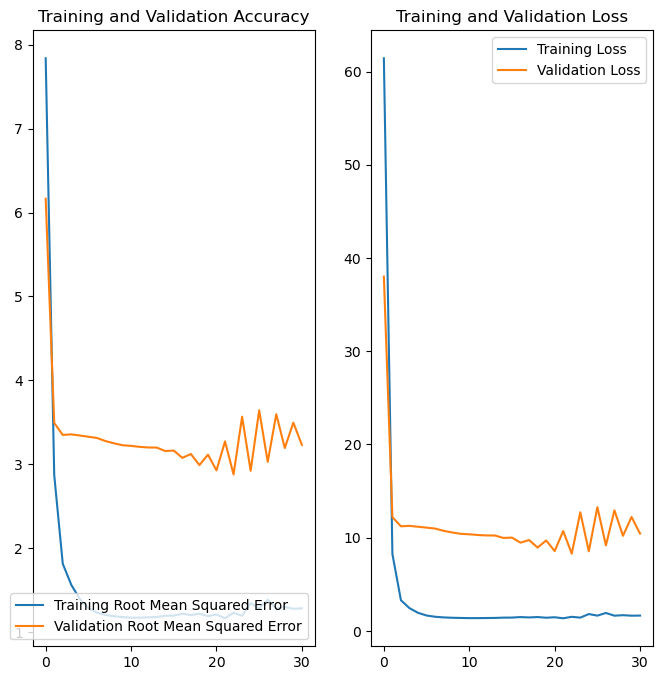

In [37]:
# code for plotting the results from the model for loss and root mean square error
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(31)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model-2

In [41]:
#from tensorflow.keras.layers import BatchNormalization  # Import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, Dropout  # Import BatchNormalization and Dropout


In [42]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(64, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(32, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
# Compile model
  
opt = Adam() 
model2.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [43]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               9344      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [44]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP2' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)


callbacks_list = [checkpoint, early_stopping]

In [45]:
history = model2.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
70/73 [===========================>..] - ETA: 0s - loss: 91.1431 - root_mean_squared_error: 9.5469 - r2_score: -75.5233
Epoch 1: val_loss improved from inf to 93.99537, saving model to DMSP2_2023-08-2203_16_35.819077\model-00001-91.04324-9.54166-93.99537-9.69512.h5
73/73 [==============================] - 8s 49ms/step - loss: 91.0432 - root_mean_squared_error: 9.5417 - r2_score: -76.0677 - val_loss: 93.9954 - val_root_mean_squared_error: 9.6951 - val_r2_score: -94.2010
Epoch 2/100
73/73 [==============================] - ETA: 0s - loss: 85.6772 - root_mean_squared_error: 9.2562 - r2_score: -71.1979
Epoch 2: val_loss improved from 93.99537 to 85.21244, saving model to DMSP2_2023-08-2203_16_35.819077\model-00002-85.67724-9.25620-85.21244-9.23106.h5
73/73 [==============================] - 3s 48ms/step - loss: 85.6772 - root_mean_squared_error: 9.2562 - r2_score: -71.1979 - val_loss: 85.2124 - val_root_mean_squared_error: 9.2311 - val_r2_score: -85.2501
Epoch 3/100
67/73 [====

Epoch 19/100
67/73 [==========================>...] - ETA: 0s - loss: 4.6183 - root_mean_squared_error: 2.1490 - r2_score: -2.7659
Epoch 19: val_loss improved from 1.48314 to 1.29225, saving model to DMSP2_2023-08-2203_16_35.819077\model-00019-4.58032-2.14017-1.29225-1.13677.h5
73/73 [==============================] - 3s 44ms/step - loss: 4.5803 - root_mean_squared_error: 2.1402 - r2_score: -2.7952 - val_loss: 1.2922 - val_root_mean_squared_error: 1.1368 - val_r2_score: -0.2000
Epoch 20/100
69/73 [===========================>..] - ETA: 0s - loss: 4.4636 - root_mean_squared_error: 2.1127 - r2_score: -2.6500
Epoch 20: val_loss did not improve from 1.29225
73/73 [==============================] - 3s 47ms/step - loss: 4.4538 - root_mean_squared_error: 2.1104 - r2_score: -2.6869 - val_loss: 1.3813 - val_root_mean_squared_error: 1.1753 - val_r2_score: -0.2730
Epoch 21/100
70/73 [===========================>..] - ETA: 0s - loss: 4.6137 - root_mean_squared_error: 2.1480 - r2_score: -2.7781
Epo

73/73 [==============================] - 4s 49ms/step - loss: 3.6607 - root_mean_squared_error: 1.9133 - r2_score: -2.0309 - val_loss: 1.1984 - val_root_mean_squared_error: 1.0947 - val_r2_score: -0.0967
Epoch 40/100
72/73 [============================>.] - ETA: 0s - loss: 3.7594 - root_mean_squared_error: 1.9389 - r2_score: -2.0911
Epoch 40: val_loss did not improve from 1.18661
73/73 [==============================] - 3s 39ms/step - loss: 3.7536 - root_mean_squared_error: 1.9374 - r2_score: -2.0847 - val_loss: 1.2114 - val_root_mean_squared_error: 1.1006 - val_r2_score: -0.1155
Epoch 41/100
70/73 [===========================>..] - ETA: 0s - loss: 3.5519 - root_mean_squared_error: 1.8847 - r2_score: -1.9218
Epoch 41: val_loss did not improve from 1.18661
73/73 [==============================] - 3s 39ms/step - loss: 3.5438 - root_mean_squared_error: 1.8825 - r2_score: -1.9369 - val_loss: 1.2038 - val_root_mean_squared_error: 1.0972 - val_r2_score: -0.1104
Epoch 42/100
73/73 [==========

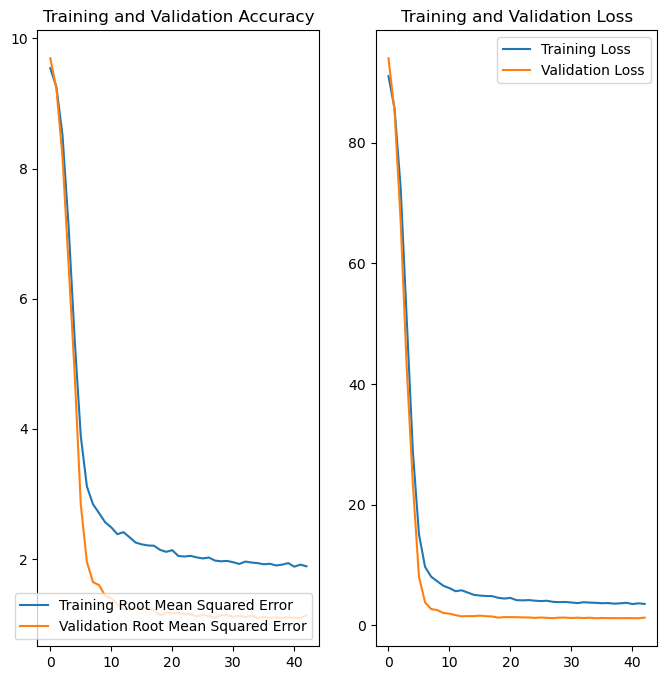

In [47]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(43)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model-3

In [48]:
model3 = Sequential()
model3.add(Dense(256, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(128, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(64, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(32, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(1, kernel_initializer='uniform',activation='linear'))
# Compile model
  
opt = Adam(0.0001) 
model3.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [49]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               18688     
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [50]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP3' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

# LR = # write the REducelronplateau code here
callbacks_list = [checkpoint, early_stopping]

In [51]:
history = model3.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=100, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
47/47 [==============================] - ETA: 0s - loss: 92.4408 - root_mean_squared_error: 9.6146 - r2_score: -73.2074
Epoch 1: val_loss improved from inf to 97.45249, saving model to DMSP3_2023-08-2203_25_05.562212\model-00001-92.44077-9.61461-97.45249-9.87180.h5
47/47 [==============================] - 7s 64ms/step - loss: 92.4408 - root_mean_squared_error: 9.6146 - r2_score: -73.2074 - val_loss: 97.4525 - val_root_mean_squared_error: 9.8718 - val_r2_score: -95.9388
Epoch 2/100
47/47 [==============================] - ETA: 0s - loss: 92.2736 - root_mean_squared_error: 9.6059 - r2_score: -73.0776
Epoch 2: val_loss improved from 97.45249 to 97.44622, saving model to DMSP3_2023-08-2203_25_05.562212\model-00002-92.27360-9.60592-97.44622-9.87148.h5
47/47 [==============================] - 2s 54ms/step - loss: 92.2736 - root_mean_squared_error: 9.6059 - r2_score: -73.0776 - val_loss: 97.4462 - val_root_mean_squared_error: 9.8715 - val_r2_score: -95.9312
Epoch 3/100
45/47 [====

Epoch 18/100
44/47 [===========================>..] - ETA: 0s - loss: 87.7676 - root_mean_squared_error: 9.3684 - r2_score: -68.1851
Epoch 18: val_loss improved from 93.97359 to 93.08325, saving model to DMSP3_2023-08-2203_25_05.562212\model-00018-87.81052-9.37073-93.08325-9.64797.h5
47/47 [==============================] - 3s 56ms/step - loss: 87.8105 - root_mean_squared_error: 9.3707 - r2_score: -69.5011 - val_loss: 93.0833 - val_root_mean_squared_error: 9.6480 - val_r2_score: -91.5983
Epoch 19/100
47/47 [==============================] - ETA: 0s - loss: 87.1661 - root_mean_squared_error: 9.3363 - r2_score: -68.9628
Epoch 19: val_loss improved from 93.08325 to 92.54701, saving model to DMSP3_2023-08-2203_25_05.562212\model-00019-87.16611-9.33628-92.54701-9.62014.h5
47/47 [==============================] - 2s 53ms/step - loss: 87.1661 - root_mean_squared_error: 9.3363 - r2_score: -68.9628 - val_loss: 92.5470 - val_root_mean_squared_error: 9.6201 - val_r2_score: -91.0918
Epoch 20/100
4

Epoch 35/100
47/47 [==============================] - ETA: 0s - loss: 72.9118 - root_mean_squared_error: 8.5388 - r2_score: -57.4226
Epoch 35: val_loss improved from 80.66616 to 79.16341, saving model to DMSP3_2023-08-2203_25_05.562212\model-00035-72.91185-8.53884-79.16341-8.89738.h5
47/47 [==============================] - 2s 53ms/step - loss: 72.9118 - root_mean_squared_error: 8.5388 - r2_score: -57.4226 - val_loss: 79.1634 - val_root_mean_squared_error: 8.8974 - val_r2_score: -77.5937
Epoch 36/100
42/47 [=========================>....] - ETA: 0s - loss: 72.0743 - root_mean_squared_error: 8.4897 - r2_score: -55.4700
Epoch 36: val_loss improved from 79.16341 to 77.98799, saving model to DMSP3_2023-08-2203_25_05.562212\model-00036-71.99566-8.48503-77.98799-8.83108.h5
47/47 [==============================] - 2s 54ms/step - loss: 71.9957 - root_mean_squared_error: 8.4850 - r2_score: -56.6858 - val_loss: 77.9880 - val_root_mean_squared_error: 8.8311 - val_r2_score: -76.4179
Epoch 37/100
4

Epoch 52/100
47/47 [==============================] - ETA: 0s - loss: 51.2661 - root_mean_squared_error: 7.1600 - r2_score: -40.2056
Epoch 52: val_loss improved from 56.39319 to 55.24519, saving model to DMSP3_2023-08-2203_25_05.562212\model-00052-51.26614-7.16004-55.24519-7.43271.h5
47/47 [==============================] - 2s 53ms/step - loss: 51.2661 - root_mean_squared_error: 7.1600 - r2_score: -40.2056 - val_loss: 55.2452 - val_root_mean_squared_error: 7.4327 - val_r2_score: -53.9506
Epoch 53/100
47/47 [==============================] - ETA: 0s - loss: 49.8954 - root_mean_squared_error: 7.0637 - r2_score: -39.0140
Epoch 53: val_loss improved from 55.24519 to 53.82522, saving model to DMSP3_2023-08-2203_25_05.562212\model-00053-49.89544-7.06367-53.82522-7.33657.h5
47/47 [==============================] - 2s 54ms/step - loss: 49.8954 - root_mean_squared_error: 7.0637 - r2_score: -39.0140 - val_loss: 53.8252 - val_root_mean_squared_error: 7.3366 - val_r2_score: -52.5591
Epoch 54/100
4

Epoch 69/100
46/47 [============================>.] - ETA: 0s - loss: 30.2435 - root_mean_squared_error: 5.4994 - r2_score: -23.1489
Epoch 69: val_loss improved from 34.11573 to 32.84806, saving model to DMSP3_2023-08-2203_25_05.562212\model-00069-30.22746-5.49795-32.84806-5.73132.h5
47/47 [==============================] - 3s 58ms/step - loss: 30.2275 - root_mean_squared_error: 5.4980 - r2_score: -23.1741 - val_loss: 32.8481 - val_root_mean_squared_error: 5.7313 - val_r2_score: -31.5397
Epoch 70/100
42/47 [=========================>....] - ETA: 0s - loss: 29.5365 - root_mean_squared_error: 5.4347 - r2_score: -21.9543
Epoch 70: val_loss improved from 32.84806 to 31.71155, saving model to DMSP3_2023-08-2203_25_05.562212\model-00070-29.33784-5.41644-31.71155-5.63130.h5
47/47 [==============================] - 2s 53ms/step - loss: 29.3378 - root_mean_squared_error: 5.4164 - r2_score: -22.2608 - val_loss: 31.7116 - val_root_mean_squared_error: 5.6313 - val_r2_score: -30.3827
Epoch 71/100
4

Epoch 86/100
45/47 [===========================>..] - ETA: 0s - loss: 17.0261 - root_mean_squared_error: 4.1263 - r2_score: -12.4584
Epoch 86: val_loss improved from 16.97648 to 16.13112, saving model to DMSP3_2023-08-2203_25_05.562212\model-00086-17.02486-4.12612-16.13112-4.01636.h5
47/47 [==============================] - 3s 69ms/step - loss: 17.0249 - root_mean_squared_error: 4.1261 - r2_score: -12.5555 - val_loss: 16.1311 - val_root_mean_squared_error: 4.0164 - val_r2_score: -14.7536
Epoch 87/100
46/47 [============================>.] - ETA: 0s - loss: 16.2007 - root_mean_squared_error: 4.0250 - r2_score: -11.8859
Epoch 87: val_loss improved from 16.13112 to 15.29157, saving model to DMSP3_2023-08-2203_25_05.562212\model-00087-16.17055-4.02126-15.29157-3.91044.h5
47/47 [==============================] - 3s 72ms/step - loss: 16.1705 - root_mean_squared_error: 4.0213 - r2_score: -11.8637 - val_loss: 15.2916 - val_root_mean_squared_error: 3.9104 - val_r2_score: -13.9483
Epoch 88/100
4

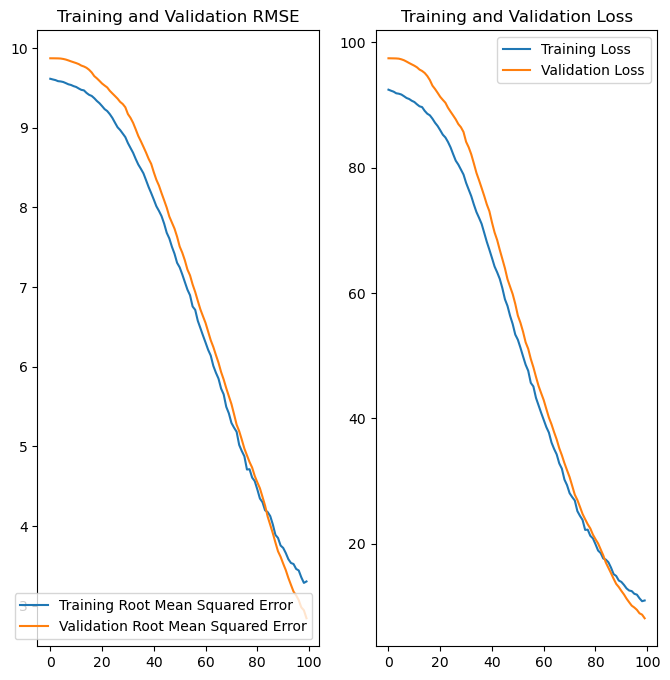

In [52]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model-4

In [53]:
model4 = Sequential()
model4.add(Dense(512, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(256, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(128, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(64, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(32, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile model
  
opt = Adam(0.001)
model4.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [54]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               37376     
                                                                 
 batch_normalization_8 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_9 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 256)              

In [55]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP4' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)


callbacks_list = [checkpoint, early_stopping]

In [56]:
history = model4.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
70/73 [===========================>..] - ETA: 0s - loss: 91.0715 - root_mean_squared_error: 9.5431 - r2_score: -75.4545
Epoch 1: val_loss improved from inf to 92.00528, saving model to DMSP4_2023-08-2203_29_59.378823\model-00001-90.96813-9.53772-92.00528-9.59194.h5
73/73 [==============================] - 12s 75ms/step - loss: 90.9681 - root_mean_squared_error: 9.5377 - r2_score: -75.9884 - val_loss: 92.0053 - val_root_mean_squared_error: 9.5919 - val_r2_score: -92.2025
Epoch 2/100
71/73 [============================>.] - ETA: 0s - loss: 85.4109 - root_mean_squared_error: 9.2418 - r2_score: -70.9950
Epoch 2: val_loss improved from 92.00528 to 81.21356, saving model to DMSP4_2023-08-2203_29_59.378823\model-00002-85.31502-9.23661-81.21356-9.01186.h5
73/73 [==============================] - 5s 73ms/step - loss: 85.3150 - root_mean_squared_error: 9.2366 - r2_score: -70.9927 - val_loss: 81.2136 - val_root_mean_squared_error: 9.0119 - val_r2_score: -81.1114
Epoch 3/100
71/73 [===

73/73 [==============================] - 5s 65ms/step - loss: 4.7880 - root_mean_squared_error: 2.1882 - r2_score: -2.9962 - val_loss: 1.3475 - val_root_mean_squared_error: 1.1608 - val_r2_score: -0.2389
Epoch 19/100
70/73 [===========================>..] - ETA: 0s - loss: 4.5252 - root_mean_squared_error: 2.1272 - r2_score: -2.6971
Epoch 19: val_loss did not improve from 1.27959
73/73 [==============================] - 5s 64ms/step - loss: 4.4930 - root_mean_squared_error: 2.1197 - r2_score: -2.7002 - val_loss: 1.2836 - val_root_mean_squared_error: 1.1330 - val_r2_score: -0.1846
Epoch 20/100
69/73 [===========================>..] - ETA: 0s - loss: 4.5860 - root_mean_squared_error: 2.1415 - r2_score: -2.7312
Epoch 20: val_loss improved from 1.27959 to 1.24553, saving model to DMSP4_2023-08-2203_29_59.378823\model-00020-4.54577-2.13208-1.24553-1.11603.h5
73/73 [==============================] - 5s 64ms/step - loss: 4.5458 - root_mean_squared_error: 2.1321 - r2_score: -2.7380 - val_loss:

Epoch 38: early stopping


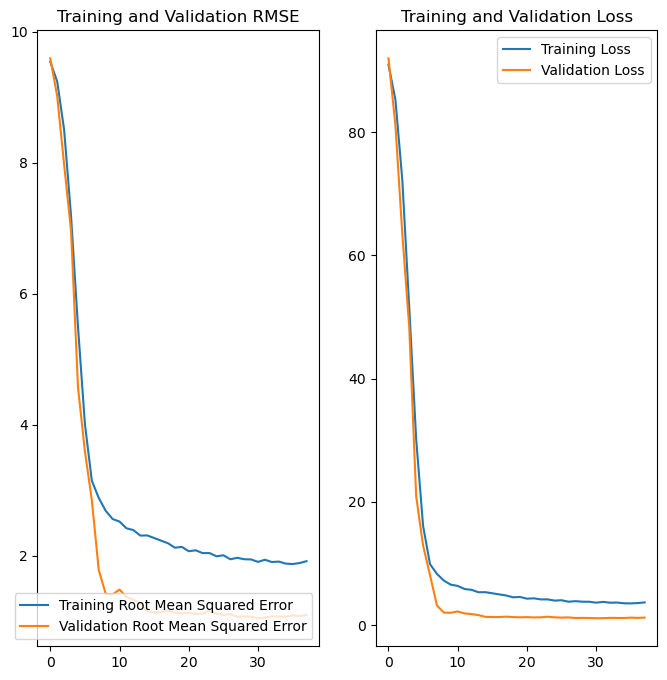

In [58]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(38)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model-5

In [59]:
model5 = Sequential()
model5.add(Dense(512, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(256, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(128, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(64, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(32, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(16, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile model
  
opt = Adam(0.002) 
model5.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [60]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               37376     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)               

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping  # Import necessary callbacks

In [63]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP5' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=0.001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

callbacks_list = [checkpoint, LR, early_stopping]

In [64]:
history = model5.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
69/73 [===========================>..] - ETA: 0s - loss: 33.1517 - root_mean_squared_error: 5.7577 - r2_score: -24.2002
Epoch 1: val_loss improved from inf to 24.13031, saving model to DMSP5_2023-08-2203_38_33.473662\model-00001-32.70165-5.71854-24.13031-4.91226.h5
73/73 [==============================] - 8s 70ms/step - loss: 32.7017 - root_mean_squared_error: 5.7185 - r2_score: -24.1537 - val_loss: 24.1303 - val_root_mean_squared_error: 4.9123 - val_r2_score: -21.5763 - lr: 0.0020
Epoch 2/100
73/73 [==============================] - ETA: 0s - loss: 14.6940 - root_mean_squared_error: 3.8333 - r2_score: -10.6021
Epoch 2: val_loss improved from 24.13031 to 22.36920, saving model to DMSP5_2023-08-2203_38_33.473662\model-00002-14.69399-3.83327-22.36920-4.72961.h5
73/73 [==============================] - 5s 64ms/step - loss: 14.6940 - root_mean_squared_error: 3.8333 - r2_score: -10.6021 - val_loss: 22.3692 - val_root_mean_squared_error: 4.7296 - val_r2_score: -19.0037 - lr: 0.00

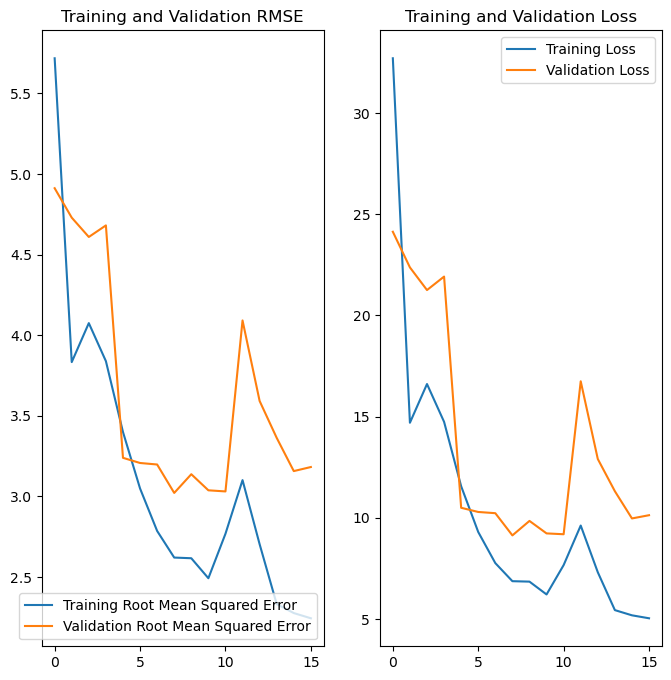

In [66]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(16)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
# as LSTM takes input in a particular format, we reshape the training and validation data
import numpy
train_X = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
#train_X = numpy.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
val_X = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

In [68]:
train_X

array([[[-1.30257863, -1.44256422, -0.01681795, ...,  0.19012527,
         -0.47749414,  0.49201846]],

       [[-1.02490731, -1.44256422, -0.02344413, ...,  0.19012527,
         -0.47749414,  0.49201846]],

       [[-0.2096066 , -1.44256422, -0.04327734, ...,  0.26407863,
         -0.65848259,  0.39562449]],

       ...,

       [[-1.06705786,  1.17351305, -1.15843804, ..., -0.54940832,
         -1.01830487, -1.22824303]],

       [[-1.37707409,  1.17351305, -1.15688476, ..., -0.54940832,
         -1.01830487, -1.22824303]],

       [[-1.68007419,  1.17351305, -1.15530243, ..., -0.54940832,
         -1.01830487, -1.22824303]]])

Model-6

In [70]:
from tensorflow.keras.layers import LSTM  # Import LSTM

In [71]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1, activation='linear'))

opt = Adam(0.001) 
model_lstm.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [72]:
model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                35072     
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 35137 (137.25 KB)
Trainable params: 35137 (137.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP6' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


callbacks_list = [checkpoint, early_stopping]

In [74]:
history = model_lstm.fit(train_X, y_train_log, validation_data=(val_X, y_val_log), epochs=100, batch_size=128, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
28/37 [=====================>........] - ETA: 0s - loss: 90.1307 - root_mean_squared_error: 9.4937 - r2_score: -65.0360  
Epoch 1: val_loss improved from inf to 87.02190, saving model to DMSP6_2023-08-2203_42_09.122480\model-00001-89.67469-9.46967-87.02190-9.32855.h5
37/37 [==============================] - 7s 77ms/step - loss: 89.6747 - root_mean_squared_error: 9.4697 - r2_score: -70.0821 - val_loss: 87.0219 - val_root_mean_squared_error: 9.3286 - val_r2_score: -84.8535
Epoch 2/100
33/37 [=========================>....] - ETA: 0s - loss: 78.4117 - root_mean_squared_error: 8.8550 - r2_score: -59.9105
Epoch 2: val_loss improved from 87.02190 to 75.51379, saving model to DMSP6_2023-08-2203_42_09.122480\model-00002-78.09872-8.83735-75.51379-8.68987.h5
37/37 [==============================] - 2s 52ms/step - loss: 78.0987 - root_mean_squared_error: 8.8373 - r2_score: -60.8085 - val_loss: 75.5138 - val_root_mean_squared_error: 8.6899 - val_r2_score: -73.4180
Epoch 3/100
32/37 [==

Epoch 18/100
37/37 [==============================] - ETA: 0s - loss: 1.6667 - root_mean_squared_error: 1.2910 - r2_score: -0.2189
Epoch 18: val_loss improved from 5.88583 to 5.76811, saving model to DMSP6_2023-08-2203_42_09.122480\model-00018-1.66669-1.29101-5.76811-2.40169.h5
37/37 [==============================] - 2s 65ms/step - loss: 1.6667 - root_mean_squared_error: 1.2910 - r2_score: -0.2189 - val_loss: 5.7681 - val_root_mean_squared_error: 2.4017 - val_r2_score: -4.3983
Epoch 19/100
34/37 [==========================>...] - ETA: 0s - loss: 1.6221 - root_mean_squared_error: 1.2736 - r2_score: -0.1746
Epoch 19: val_loss improved from 5.76811 to 5.68148, saving model to DMSP6_2023-08-2203_42_09.122480\model-00019-1.59223-1.26184-5.68148-2.38359.h5
37/37 [==============================] - 2s 64ms/step - loss: 1.5922 - root_mean_squared_error: 1.2618 - r2_score: -0.1666 - val_loss: 5.6815 - val_root_mean_squared_error: 2.3836 - val_r2_score: -4.3157
Epoch 20/100
34/37 [==============

29/37 [======================>.......] - ETA: 0s - loss: 1.2352 - root_mean_squared_error: 1.1114 - r2_score: 0.1329
Epoch 35: val_loss improved from 5.25490 to 5.24408, saving model to DMSP6_2023-08-2203_42_09.122480\model-00035-1.17194-1.08256-5.24408-2.29000.h5
37/37 [==============================] - 2s 51ms/step - loss: 1.1719 - root_mean_squared_error: 1.0826 - r2_score: 0.1293 - val_loss: 5.2441 - val_root_mean_squared_error: 2.2900 - val_r2_score: -3.8760
Epoch 36/100
36/37 [============================>.] - ETA: 0s - loss: 1.1629 - root_mean_squared_error: 1.0784 - r2_score: 0.1353
Epoch 36: val_loss improved from 5.24408 to 5.23419, saving model to DMSP6_2023-08-2203_42_09.122480\model-00036-1.16099-1.07749-5.23419-2.28783.h5
37/37 [==============================] - 2s 59ms/step - loss: 1.1610 - root_mean_squared_error: 1.0775 - r2_score: 0.1370 - val_loss: 5.2342 - val_root_mean_squared_error: 2.2878 - val_r2_score: -3.8658
Epoch 37/100
33/37 [=========================>....]

34/37 [==========================>...] - ETA: 0s - loss: 1.0481 - root_mean_squared_error: 1.0238 - r2_score: 0.2276
Epoch 52: val_loss improved from 5.14011 to 5.13872, saving model to DMSP6_2023-08-2203_42_09.122480\model-00052-1.03425-1.01698-5.13872-2.26687.h5
37/37 [==============================] - 3s 77ms/step - loss: 1.0342 - root_mean_squared_error: 1.0170 - r2_score: 0.2261 - val_loss: 5.1387 - val_root_mean_squared_error: 2.2669 - val_r2_score: -3.7725
Epoch 53/100
29/37 [======================>.......] - ETA: 0s - loss: 1.0803 - root_mean_squared_error: 1.0394 - r2_score: 0.2356
Epoch 53: val_loss improved from 5.13872 to 5.13777, saving model to DMSP6_2023-08-2203_42_09.122480\model-00053-1.02829-1.01405-5.13777-2.26666.h5
37/37 [==============================] - 2s 58ms/step - loss: 1.0283 - root_mean_squared_error: 1.0140 - r2_score: 0.2304 - val_loss: 5.1378 - val_root_mean_squared_error: 2.2667 - val_r2_score: -3.7719
Epoch 54/100
36/37 [============================>.]

Epoch 73/100
37/37 [==============================] - ETA: 0s - loss: 0.9191 - root_mean_squared_error: 0.9587 - r2_score: 0.3116
Epoch 73: val_loss did not improve from 5.13746
37/37 [==============================] - 2s 53ms/step - loss: 0.9191 - root_mean_squared_error: 0.9587 - r2_score: 0.3116 - val_loss: 5.1963 - val_root_mean_squared_error: 2.2795 - val_r2_score: -3.8397
Epoch 74/100
28/37 [=====================>........] - ETA: 0s - loss: 0.9751 - root_mean_squared_error: 0.9875 - r2_score: 0.3181
Epoch 74: val_loss did not improve from 5.13746
37/37 [==============================] - 2s 54ms/step - loss: 0.9135 - root_mean_squared_error: 0.9558 - r2_score: 0.3158 - val_loss: 5.1931 - val_root_mean_squared_error: 2.2788 - val_r2_score: -3.8361
Epoch 75/100
37/37 [==============================] - ETA: 0s - loss: 0.9102 - root_mean_squared_error: 0.9540 - r2_score: 0.3185
Epoch 75: val_loss did not improve from 5.13746
37/37 [==============================] - 2s 52ms/step - loss

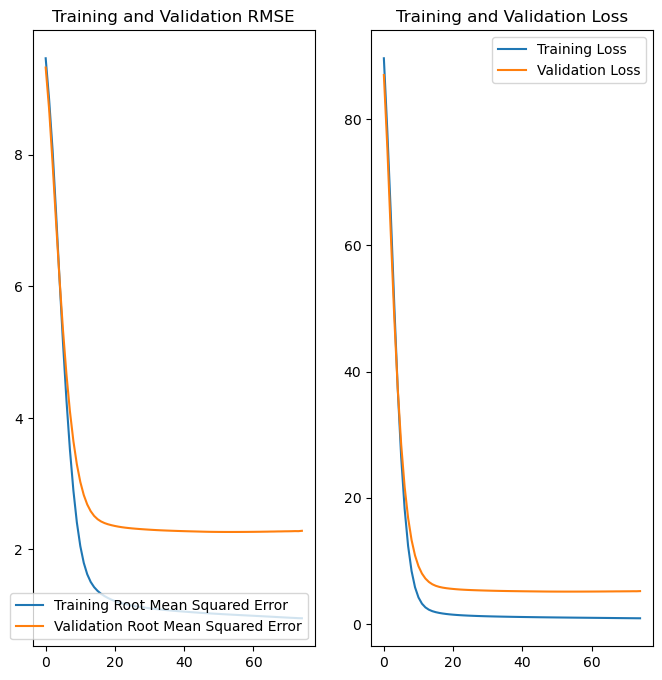

In [76]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(75)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model-7

In [77]:
model_lstm2 = Sequential()
model_lstm2.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(64, activation=keras.layers.LeakyReLU(alpha=0.02)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(1, activation='linear'))
opt = Adam(0.001) 
model_lstm2.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [78]:
model_lstm2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               336896    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                16448     
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
Total params: 353409 (1.35 MB)
Trainable params: 353409 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP7' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

callbacks_list = [checkpoint, early_stopping]

In [80]:
history = model_lstm2.fit(train_X, y_train_log, validation_data=(val_X, y_val_log), epochs=100, batch_size=128, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 87.4862 - root_mean_squared_error: 9.3534 - r2_score: -68.3660
Epoch 1: val_loss improved from inf to 73.91743, saving model to DMSP7_2023-08-2203_46_02.465068\model-00001-87.48624-9.35341-73.91743-8.59752.h5
37/37 [==============================] - 9s 131ms/step - loss: 87.4862 - root_mean_squared_error: 9.3534 - r2_score: -68.3660 - val_loss: 73.9174 - val_root_mean_squared_error: 8.5975 - val_r2_score: -72.9009
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 52.9659 - root_mean_squared_error: 7.2778 - r2_score: -40.3827
Epoch 2: val_loss improved from 73.91743 to 25.17411, saving model to DMSP7_2023-08-2203_46_02.465068\model-00002-52.96587-7.27777-25.17411-5.01738.h5
37/37 [==============================] - 4s 104ms/step - loss: 52.9659 - root_mean_squared_error: 7.2778 - r2_score: -40.3827 - val_loss: 25.1741 - val_root_mean_squared_error: 5.0174 - val_r2_score: -23.6378
Epoch 3/100
37/37 [==

Epoch 20/100
36/37 [============================>.] - ETA: 0s - loss: 5.0173 - root_mean_squared_error: 2.2399 - r2_score: -2.9100
Epoch 20: val_loss did not improve from 6.23954
37/37 [==============================] - 4s 102ms/step - loss: 5.0163 - root_mean_squared_error: 2.2397 - r2_score: -2.9157 - val_loss: 8.1720 - val_root_mean_squared_error: 2.8587 - val_r2_score: -6.5121
Epoch 21/100
37/37 [==============================] - ETA: 0s - loss: 5.0128 - root_mean_squared_error: 2.2389 - r2_score: -2.9089
Epoch 21: val_loss improved from 6.23954 to 6.14456, saving model to DMSP7_2023-08-2203_46_02.465068\model-00021-5.01281-2.23893-6.14456-2.47882.h5
37/37 [==============================] - 4s 104ms/step - loss: 5.0128 - root_mean_squared_error: 2.2389 - r2_score: -2.9089 - val_loss: 6.1446 - val_root_mean_squared_error: 2.4788 - val_r2_score: -4.6849
Epoch 22/100
37/37 [==============================] - ETA: 0s - loss: 4.6684 - root_mean_squared_error: 2.1607 - r2_score: -2.6487
E

37/37 [==============================] - ETA: 0s - loss: 4.4410 - root_mean_squared_error: 2.1074 - r2_score: -2.4819
Epoch 40: val_loss did not improve from 4.51659
37/37 [==============================] - 4s 101ms/step - loss: 4.4410 - root_mean_squared_error: 2.1074 - r2_score: -2.4819 - val_loss: 6.1314 - val_root_mean_squared_error: 2.4762 - val_r2_score: -4.6134
Epoch 41/100
37/37 [==============================] - ETA: 0s - loss: 4.2371 - root_mean_squared_error: 2.0584 - r2_score: -2.2897
Epoch 41: val_loss did not improve from 4.51659
37/37 [==============================] - 4s 101ms/step - loss: 4.2371 - root_mean_squared_error: 2.0584 - r2_score: -2.2897 - val_loss: 5.9862 - val_root_mean_squared_error: 2.4467 - val_r2_score: -4.4408
Epoch 42/100
37/37 [==============================] - ETA: 0s - loss: 4.1202 - root_mean_squared_error: 2.0298 - r2_score: -2.2229
Epoch 42: val_loss did not improve from 4.51659
37/37 [==============================] - 4s 101ms/step - loss: 4.1

Epoch 61/100
37/37 [==============================] - ETA: 0s - loss: 3.5415 - root_mean_squared_error: 1.8819 - r2_score: -1.7353
Epoch 61: val_loss did not improve from 3.53078
37/37 [==============================] - 4s 102ms/step - loss: 3.5415 - root_mean_squared_error: 1.8819 - r2_score: -1.7353 - val_loss: 4.9329 - val_root_mean_squared_error: 2.2210 - val_r2_score: -3.5037
Epoch 62/100
37/37 [==============================] - ETA: 0s - loss: 3.5404 - root_mean_squared_error: 1.8816 - r2_score: -1.7303
Epoch 62: val_loss did not improve from 3.53078
37/37 [==============================] - 4s 103ms/step - loss: 3.5404 - root_mean_squared_error: 1.8816 - r2_score: -1.7303 - val_loss: 3.5806 - val_root_mean_squared_error: 1.8922 - val_r2_score: -2.2908
Epoch 63/100
37/37 [==============================] - ETA: 0s - loss: 3.4170 - root_mean_squared_error: 1.8485 - r2_score: -1.6730
Epoch 63: val_loss did not improve from 3.53078
37/37 [==============================] - 4s 105ms/ste

Epoch 82/100
37/37 [==============================] - ETA: 0s - loss: 2.7799 - root_mean_squared_error: 1.6673 - r2_score: -1.1562
Epoch 82: val_loss did not improve from 3.17609
37/37 [==============================] - 5s 133ms/step - loss: 2.7799 - root_mean_squared_error: 1.6673 - r2_score: -1.1562 - val_loss: 3.8821 - val_root_mean_squared_error: 1.9703 - val_r2_score: -2.5401
Epoch 83/100
37/37 [==============================] - ETA: 0s - loss: 2.6940 - root_mean_squared_error: 1.6413 - r2_score: -1.0763
Epoch 83: val_loss did not improve from 3.17609
37/37 [==============================] - 5s 127ms/step - loss: 2.6940 - root_mean_squared_error: 1.6413 - r2_score: -1.0763 - val_loss: 3.7675 - val_root_mean_squared_error: 1.9410 - val_r2_score: -2.4387
Epoch 84/100
35/37 [===========================>..] - ETA: 0s - loss: 2.6936 - root_mean_squared_error: 1.6412 - r2_score: -1.0753
Epoch 84: val_loss improved from 3.17609 to 2.92891, saving model to DMSP7_2023-08-2203_46_02.465068\

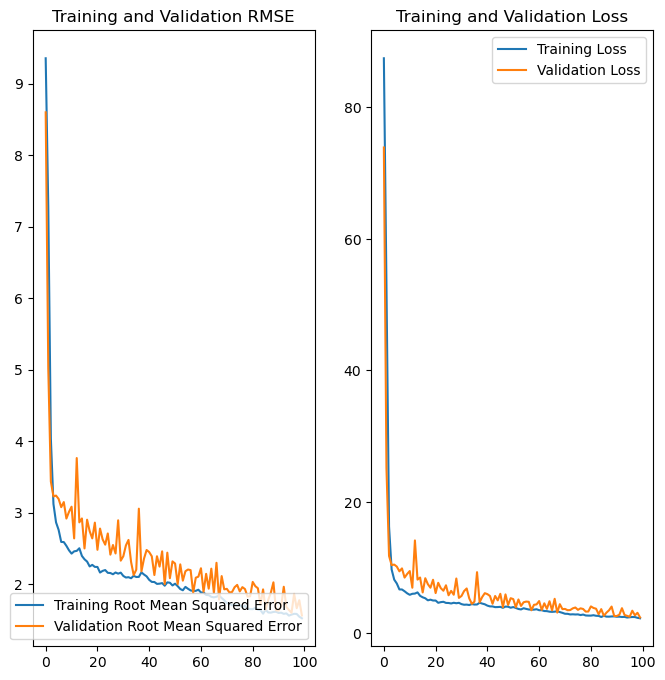

In [81]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [82]:
model_lstm3 = Sequential()
model_lstm3.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(128, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(64, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(16, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(8, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(1, activation='linear'))
opt = Adam(0.001)
model_lstm3.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [83]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP8' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


callbacks_list = [checkpoint, early_stopping]

In [84]:
history = model_lstm3.fit(train_X, y_train_log, validation_data=(val_X, y_val_log), epochs=100, batch_size=128, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
35/37 [===========================>..] - ETA: 0s - loss: 76.5532 - root_mean_squared_error: 8.7495 - r2_score: -57.0266
Epoch 1: val_loss improved from inf to 20.13427, saving model to DMSP8_2023-08-2203_54_21.455911\model-00001-74.95493-8.65765-20.13427-4.48712.h5
37/37 [==============================] - 12s 152ms/step - loss: 74.9549 - root_mean_squared_error: 8.6577 - r2_score: -55.6145 - val_loss: 20.1343 - val_root_mean_squared_error: 4.4871 - val_r2_score: -18.1891
Epoch 2/100
36/37 [============================>.] - ETA: 0s - loss: 30.0884 - root_mean_squared_error: 5.4853 - r2_score: -22.1530
Epoch 2: val_loss improved from 20.13427 to 19.70520, saving model to DMSP8_2023-08-2203_54_21.455911\model-00002-29.97908-5.47532-19.70520-4.43905.h5
37/37 [==============================] - 5s 124ms/step - loss: 29.9791 - root_mean_squared_error: 5.4753 - r2_score: -21.9415 - val_loss: 19.7052 - val_root_mean_squared_error: 4.4391 - val_r2_score: -18.7954
Epoch 3/100
37/37 [=

Epoch 20/100
36/37 [============================>.] - ETA: 0s - loss: 10.0969 - root_mean_squared_error: 3.1776 - r2_score: -6.9309
Epoch 20: val_loss improved from 4.29836 to 4.18805, saving model to DMSP8_2023-08-2203_54_21.455911\model-00020-10.09963-3.17799-4.18805-2.04647.h5
37/37 [==============================] - 6s 154ms/step - loss: 10.0996 - root_mean_squared_error: 3.1780 - r2_score: -6.9522 - val_loss: 4.1880 - val_root_mean_squared_error: 2.0465 - val_r2_score: -2.8879
Epoch 21/100
36/37 [============================>.] - ETA: 0s - loss: 9.7069 - root_mean_squared_error: 3.1156 - r2_score: -6.5932
Epoch 21: val_loss did not improve from 4.18805
37/37 [==============================] - 5s 133ms/step - loss: 9.7054 - root_mean_squared_error: 3.1154 - r2_score: -6.6046 - val_loss: 4.3140 - val_root_mean_squared_error: 2.0770 - val_r2_score: -2.9545
Epoch 22/100
37/37 [==============================] - ETA: 0s - loss: 9.9743 - root_mean_squared_error: 3.1582 - r2_score: -6.787

Epoch 40/100
36/37 [============================>.] - ETA: 0s - loss: 7.3577 - root_mean_squared_error: 2.7125 - r2_score: -4.7447
Epoch 40: val_loss did not improve from 2.11278
37/37 [==============================] - 5s 136ms/step - loss: 7.3448 - root_mean_squared_error: 2.7101 - r2_score: -4.7246 - val_loss: 2.4714 - val_root_mean_squared_error: 1.5721 - val_r2_score: -1.2694
Epoch 41/100
37/37 [==============================] - ETA: 0s - loss: 6.8518 - root_mean_squared_error: 2.6176 - r2_score: -4.3500
Epoch 41: val_loss did not improve from 2.11278
37/37 [==============================] - 4s 112ms/step - loss: 6.8518 - root_mean_squared_error: 2.6176 - r2_score: -4.3500 - val_loss: 2.3735 - val_root_mean_squared_error: 1.5406 - val_r2_score: -1.1833
Epoch 42/100
36/37 [============================>.] - ETA: 0s - loss: 6.9882 - root_mean_squared_error: 2.6435 - r2_score: -4.4505
Epoch 42: val_loss did not improve from 2.11278
37/37 [==============================] - 4s 120ms/ste

Epoch 60/100
37/37 [==============================] - ETA: 0s - loss: 5.2571 - root_mean_squared_error: 2.2928 - r2_score: -3.1376
Epoch 60: val_loss did not improve from 1.33191
37/37 [==============================] - 5s 125ms/step - loss: 5.2571 - root_mean_squared_error: 2.2928 - r2_score: -3.1376 - val_loss: 1.7727 - val_root_mean_squared_error: 1.3314 - val_r2_score: -0.6344
Epoch 61/100
36/37 [============================>.] - ETA: 0s - loss: 5.2126 - root_mean_squared_error: 2.2831 - r2_score: -3.0855
Epoch 61: val_loss did not improve from 1.33191
37/37 [==============================] - 5s 148ms/step - loss: 5.2095 - root_mean_squared_error: 2.2824 - r2_score: -3.0858 - val_loss: 1.5876 - val_root_mean_squared_error: 1.2600 - val_r2_score: -0.4495
Epoch 62/100
37/37 [==============================] - ETA: 0s - loss: 5.1579 - root_mean_squared_error: 2.2711 - r2_score: -3.0891
Epoch 62: val_loss improved from 1.33191 to 1.30126, saving model to DMSP8_2023-08-2203_54_21.455911\

Epoch 81/100
36/37 [============================>.] - ETA: 0s - loss: 4.0110 - root_mean_squared_error: 2.0027 - r2_score: -2.1297
Epoch 81: val_loss did not improve from 0.94504
37/37 [==============================] - 5s 135ms/step - loss: 4.0072 - root_mean_squared_error: 2.0018 - r2_score: -2.1268 - val_loss: 1.1284 - val_root_mean_squared_error: 1.0623 - val_r2_score: -0.0454
Epoch 82/100
37/37 [==============================] - ETA: 0s - loss: 4.0540 - root_mean_squared_error: 2.0135 - r2_score: -2.1451
Epoch 82: val_loss did not improve from 0.94504
37/37 [==============================] - 4s 121ms/step - loss: 4.0540 - root_mean_squared_error: 2.0135 - r2_score: -2.1451 - val_loss: 1.2064 - val_root_mean_squared_error: 1.0984 - val_r2_score: -0.1135
Epoch 83/100
35/37 [===========================>..] - ETA: 0s - loss: 4.2467 - root_mean_squared_error: 2.0607 - r2_score: -2.3104
Epoch 83: val_loss did not improve from 0.94504
37/37 [==============================] - 4s 120ms/ste

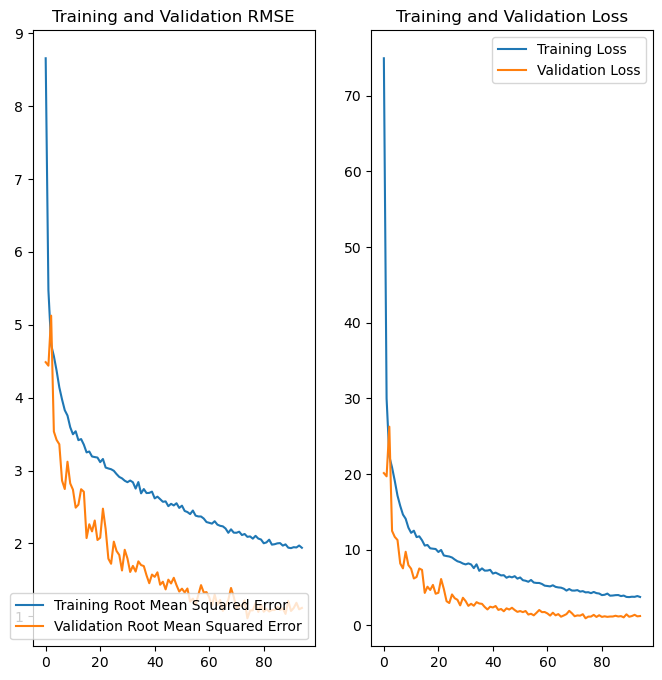

In [86]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(95)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()